# Table of Contents
1. [Imports](#Imports)
2. [Setup of Initial Variables](#setup_init_variables)
3. [Get Bitcoin Logo](#get_btc_logo)
4. [Utility Functions for Data Preprocessing](#util_data_preprocess)
5. [Download Data Sets](#download_datasets)
    - [Extraction of Blockchain Data](#blockchain_data)
    - [Extraction of Macroeconomic Data](#macroecon_data)
    - [Extraction of Exchange Data](#exchange_data)<br><br>
     - [Vizualize Exchange Data](#price_vizualization)
     - [Preprocess Exchange Data](#preprocess_exch_data)
     - [Plot Histogram of Daily Price Changes](#hist_daily_price_ch)<br><br>
    - [Extraction of Global Currencies Exchange Data](#global_curr_exch_data)
    - [Extraction of Sentiment Data](#sentiment_data)<br><br>
7. [Merge of All Data Source](#merge_data_source)
8. [Min-Max Scaling (a.k.a Normalization)](#normalization)
9. [Statistic of Data Prior Training](#statistics)
    - [Visualize the Whole Dataset](#viz_dataset)
    - [Looking for Trends](#sesonality_differentiation)
    - [Pearson Correlation](#pearson_corr)<br><br>
10. [ML Pipeline](#ml_pipeline)
   - [Split Data (Testing, Training Data Sets)](#split_data)
   - [Set Window Length](#win_len_metrics)
   - [Fill Training, Test Data](#fill_training_test)
   - [Load Model](#load_model)
   - [Train Model](#train_model)
   - [Graph Predicted Values with Training Set](#graph_pred_training_set)
   - [Graph Predicted Values with Test Data](#graph_pred_test_set)

In [3]:
from cryptory import Cryptory
import matplotlib.pyplot as plt
import urllib.request as urllib
from datetime import timedelta
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import quandl
import time

from_date="2013-04-28"
to_date="2018-10-01"

In [1]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# import pandas as pd

# accounts = go.Scatter(
#                 x=bch_accounts.Date,
#                 y=bch_accounts['btc_Accounts'],
#                 name = "Accounts",
#                 line = dict(color = '#6D13C1'),
#                 opacity = 0.8)

# high = go.Scatter(
#                 x=bitcoin_market_info.Date,
#                 y=bitcoin_market_info['btc_High'],
#                 name = "High",
#                 line = dict(color = '#17BECF'),
#                 opacity = 0.8)

# low =go.Scatter(
#                 x=bitcoin_market_info.Date,
#                 y=bitcoin_market_info['btc_Low'],
#                 name = "Low",
#                 line = dict(color = '#7F7F7F'),
#                 opacity = 0.8)

# block_size =go.Scatter(
#                 x=avg_block_size.Date,
#                 y=avg_block_size['btc_avg_block_size'],
#                 name = "Avg. blockcsize",
#                 line = dict(color = '#D8B1B1'),
#                 opacity = 0.8)

# txs =go.Scatter(
#                 x=txs_data.Date,
#                 y=txs_data['btc_transactions'],
#                 name = "Nr of Transactions",
#                 line = dict(color = '#E125E8'),
#                 opacity = 0.8)

# miner_revenue =go.Scatter(
#                 x=bchain_mirev_data.Date,
#                 y=bchain_mirev_data['btc_mining_revenue'],
#                 name = "Miners Revenue",
#                 line = dict(color = '#3D0A3F'),
#                 opacity = 0.8)

# s_and_p =go.Scatter(
#                 x=s_and_p_stock.Date,
#                 y=s_and_p_stock['sp_close'],
#                 name = "S&P 500 Closing Price",
#                 line = dict(color = '#68340B'),
#                 opacity = 0.8)

# dow_jones_stock =go.Scatter(
#                 x=dow_jones_stock.Date,
#                 y=dow_jones_stock['dj_close'],
#                 name = "Dow Jones Closing Price",
#                 line = dict(color = '#00E1FF'),
#                 opacity = 0.8)


# data = [low, high, block_size, txs, accounts, s_and_p, dow_jones_stock, miner_revenue]

# layout = dict(
#     title = "Manually Set Date Range",
#     xaxis = dict(
#         range = ['2014-01-01','2018-09-23'])
# )

# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename = "Manually Set Range")

## Long Short Term Memory (LSTM)

Like I said, if you're interested in the theory behind LSTMs, then I'll refer you to [this](http://colah.github.io/posts/2015-08-Understanding-LSTMs/), [this](http://blog.echen.me/2017/05/30/exploring-lstms/) and [this](http://www.bioinf.jku.at/publications/older/2604.pdf). Luckily, we don't need to build the network from scratch (or even understand it), there exists packages that include standard implementations of various deep learning algorithms (e.g. [TensorFlow](https://www.tensorflow.org/get_started/get_started), [Keras](https://keras.io/#keras-the-python-deep-learning-library), [PyTorch](http://pytorch.org/), etc.). I'll opt for Keras, as I find it the most intuitive for non-experts. If you're not familiar with Keras, then check out my [previous tutorial](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/).

In [3]:
model_data = pd.read_csv('model_data.csv').iloc[:,1:]
model_data

,date,btc_high,btc_close,btc_volume,btc_market_cap,bch_avg_block_size,bch_transactions,bch_mining_revenue,bch_accounts,sp_close,dj_close,google_trends_bitcoin
0,2014-01-01,0.321552,0.331202,0.160900,0.339832,0.727437,0.523625,0.214075,1.000000,0.975489,0.982462,0.041897
1,2014-01-02,0.319950,0.327366,0.162952,0.342786,0.727437,0.523625,0.205355,0.999343,0.995592,1.000000,0.043465
2,2014-01-03,0.321981,0.330136,0.166809,0.344857,0.746110,0.524973,0.238706,0.998520,0.993843,0.995247,0.041897
3,2014-01-04,0.324067,0.331871,0.167720,0.346238,0.746110,0.524973,0.245823,0.997272,0.994819,0.984533,0.038763
4,2014-01-05,0.323588,0.333732,0.167775,0.345387,0.584187,0.461143,0.227486,0.996607,0.985894,0.967694,0.037195
5,2014-01-06,0.323554,0.332510,0.182936,0.347399,0.584187,0.461143,0.236537,0.995442,0.985894,0.967694,0.037195
6,2014-01-07,0.330694,0.334693,0.210234,0.349265,0.765816,0.540268,0.213521,0.994664,0.985894,0.967694,0.046600
7,2014-01-08,0.327025,0.336381,0.193135,0.339428,0.765816,0.540268,0.204635,0.993679,0.985911,0.966090,0.045032
8,2014-01-09,0.320677,0.326974,0.186024,0.337123,0.658221,0.549203,0.248511,0.992493,0.979156,0.961319,0.046600
9,2014-01-10,0.321569,0.324462,0.198142,0.345137,0.658221,0.549203,0.223961,0.991402,0.987223,0.970654,0.048167


In [6]:
market_info.head()
market_info.isnull().values.any()
market_info.to_csv('market_info.csv')

In [7]:
# from sklearn.preprocessing import minmax_scale, Imputer

# # model_data.fillna(model_data.mean(),inplace=True)

# mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# btc_without_date = model_data.loc[:, model_data.columns != 'Date']

# # Train the imputor on the df dataset
# mean_imputer = mean_imputer.fit(btc_without_date)

# # Apply the imputer to the df dataset
# imputed_df = mean_imputer.transform(btc_without_date)

# # Get back columns
# imputed_df = pd.DataFrame(imputed_df, columns = btc_without_date.columns)

# imputed_df[['bt_Close','bt_Volume', 'sp_close', 'dj_close', 'bt_google_trends_bitcoin','bt_avg_block_size', \
#                                     'bt_mining_revenue', 'bt_transactions', 'bt_Accounts']] = \
#                 minmax_scale(imputed_df[['bt_Close', 'sp_close', 'dj_close', 'bt_Volume', \
#                                         'bt_mining_revenue', 'bt_google_trends_bitcoin','bt_avg_block_size', 'bt_transactions','bt_Accounts']])

# # imputed_df[['bt_Close','bt_Volume', 'bt_google_trends_bitcoin']] = \
# #         minmax_scale(imputed_df[['bt_Close','bt_Volume', 'bt_google_trends_bitcoin']])

# # imputed_df[['bt_Close','bt_Volume']] = \
# #         minmax_scale(imputed_df[['bt_Close','bt_Volume']])

# # Re add date column
# imputed_df['Date'] = model_data['Date']

# # Order by date
# imputed_df["Date"] = imputed_df["Date"].values[::-1]

# model_data=imputed_df
# # model_data.to_csv('model_data.csv')

In [7]:
model_data.head()

,Date,sp_close,dj_close,btc_Open,btc_High,btc_Close,btc_Volume,btc_Market Cap,btc_google_trends_bitcoin,btc_avg_block_size,btc_transactions,btc_Accounts,btc_mining_revenue
1726,2014-01-01,0.202753,0.158649,0.035372,0.035014,0.036182,0.000943,0.025890,0.024518,0.026115,0.031834,0.077695,0.065017
1725,2014-01-02,0.190688,0.147451,0.036323,0.037261,0.037777,0.001614,0.026582,0.027865,0.026115,0.031834,0.096234,0.046764
1724,2014-01-03,0.190239,0.149821,0.037839,0.037952,0.038617,0.001586,0.027684,0.031213,0.119025,0.088241,0.117316,0.056611
1723,2014-01-04,0.190239,0.149821,0.038891,0.039219,0.040717,0.001594,0.028449,0.025633,0.119025,0.088241,0.096473,0.051999
1722,2014-01-05,0.190239,0.149821,0.040709,0.043860,0.044526,0.003058,0.029771,0.030097,0.088264,0.067895,0.099443,0.070736


In [9]:
split_date='2018-06-01'
# we don't need the date columns anymore
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [10]:
len(test_set.columns)

12

In [11]:
window_len = 65

LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    LSTM_training_inputs.append(temp_set)   
    
# LSTM_training_inputs[0]

In [12]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    LSTM_test_inputs.append(temp_set)
    
#     for col in norm_cols:
#         temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
#     LSTM_test_inputs.append(temp_set)

# LSTM_test_inputs = []
# for i in range(len(test_set)-window_len):
#     temp_set = test_set[i:(i+window_len)].copy()
#     LSTM_test_inputs.append(temp_set)
# LSTM_test_outputs = test_set['bt_Close'][window_len:].values
# LSTM_test_outputs = test_set['bt_Close'][window_len:].values-1

# print(LSTM_test_inputs[0])
LSTM_test_outputs = test_set['btc_Close'][window_len:].values
print(len(LSTM_test_outputs)) # predicting 45 points in the future

50


This table represents an example of our LSTM model input (we'll actually have hundreds of similar tables). We've normalised some columns so that their values are equal to 0 in the first time point, so we're aiming to predict changes in price relative to this timepoint. We're now ready to build the LSTM model. This is actually quite straightforward with Keras, you simply stack componenets on top of each other (better explained [here](https://dashee87.github.io/data%20science/deep%20learning/python/another-keras-tutorial-for-neural-network-beginners/)).

In [13]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [14]:
# import the relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout

def build_model(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation("linear"))

    model.compile(loss=loss, optimizer=optimizer)
    return model


def gru_model(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(GRU(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(0.15))  # Dropout overfitting

    # model.add(GRU(layers[2],activation='tanh', return_sequences=True))
    # model.add(Dropout(0.2))  # Dropout overfitting

    model.add(GRU(neurons, input_shape=(inputs.shape[1], inputs.shape[2]), 
                  activation='tanh', return_sequences=False))
    model.add(Dropout(0.15))  # Dropout overfitting

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    # sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    # model.compile(loss="mse", optimizer=sgd)
    model.compile(loss="mse", optimizer="rmsprop") # Nadam rmsprop
    print ("Compilation Time : ", time.time() - start)
    return model 



def denser_model(inputs, output_size, neurons, activ_func='tanh', 
                 dropout=0.3, loss='mae', optimizer='adam'):
    """
    inputs: input data as numpy array
    output_size: number of predictions per input sample
    neurons: number of neurons/ units in the LSTM layer
    active_func: Activation function to be used in LSTM layers and Dense layer
    dropout: dropout ration, default is 0.25
    loss: loss function for calculating the gradient
    optimizer: type of optimizer to backpropagate the gradient
    This function will build 3 layered RNN model with LSTM cells with dropouts after each LSTM layer 
    and finally a dense layer to produce the output using keras' sequential model.
    Return: Keras sequential model and model summary
    """
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    model.summary()
    return model

Using TensorFlow backend.


In [15]:
# random seed for reproducibility
np.random.seed(202)

pred_range=60

# initialise model architecture
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 100)
# bt_model = denser_model(LSTM_training_inputs, output_size=pred_range, neurons = 100)

# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []

for i in range(window_len, len(training_set['btc_Close'])-pred_range):
    LSTM_training_outputs.append(training_set['btc_Close'][i:i+pred_range].values)
    
LSTM_training_outputs = np.array(LSTM_training_outputs)
print(bt_model.get_weights())
# train model on data
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=120, verbose=2, shuffle=True)

[array([[-0.00013822, -0.06106792,  0.10776572, ...,  0.10898142,
        -0.09600256,  0.03442807],
       [ 0.09821731,  0.00263345, -0.05255553, ...,  0.00569086,
        -0.02730787, -0.04569017],
       [ 0.0780047 , -0.0460289 ,  0.09915353, ...,  0.0528841 ,
        -0.0464635 ,  0.08980535],
       ...,
       [ 0.09350048, -0.09420775,  0.01824959, ...,  0.10316053,
        -0.00692932,  0.04098645],
       [ 0.0526219 ,  0.03779012,  0.03271791, ..., -0.00932365,
        -0.03446206,  0.10858494],
       [-0.10022227, -0.03279163, -0.11224488, ..., -0.11940891,
        -0.07235562, -0.04712335]], dtype=float32), array([[-0.13244021,  0.04335991,  0.06624217, ...,  0.04899031,
        -0.08540058, -0.05648996],
       [ 0.05374488,  0.03159233, -0.01711521, ...,  0.02125785,
         0.01233767,  0.002683  ],
       [ 0.0327259 , -0.03872018, -0.01054513, ..., -0.04347579,
        -0.05101265, -0.01117337],
       ...,
       [-0.02732293, -0.00524141, -0.05093112, ..., -0.053

In [16]:
from ann_visualizer.visualize import ann_viz;
from keras.utils.vis_utils import plot_model
graph = plot_model(bt_model, to_file="my_model.png", show_shapes=True)

#Build your model here
# ann_viz(bt_model)

In [17]:
x1 = np.array([0,0,1,1])
x2 = np.array([0,1,1,0])

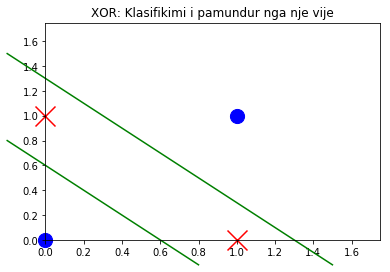

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

# line, = ax.plot(x1, x2, lw=2)

# ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

ax.set_ylim(0,1.75)
ax.set_xlim(0,1.75)

# plt.scatter([0,1],[1,0], s=500,marker="o", c="r")
line = plt.scatter(1.00,1.00, s=200,marker="o", c="b")
line2=plt.scatter(0.00,0.00, s=200,marker="o", c="b")
line3 = plt.scatter(0,1.00, s=400,marker="x", c="r")
line4=plt.scatter(1.00,0.00, s=400,marker="x", c="r")
line3.set_clip_on(False)
line2.set_clip_on(False)
line4.set_clip_on(False)
x1, y1 = [-0.2,0.8], [0.8, -0.2]

x2, y2 = [-0.2,1.5], [1.5, -0.2]

line5=plt.plot(x1, y1, x2, y2, clip_on = False,color="green")
plt.title("XOR: Klasifikimi i pamundur nga nje vije")
plt.show()

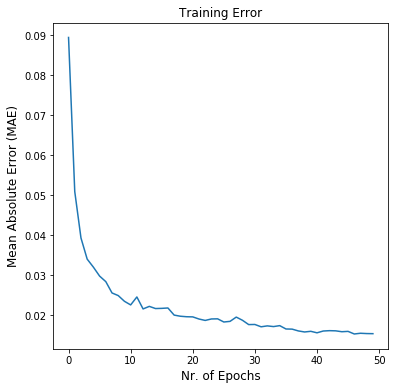

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6

# fig.clear()
fig, ax1 = plt.subplots(1,1)

ax1.plot(bt_history.epoch, bt_history.history['loss'])
ax1.set_title('Training Error')

if bt_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
# just in case you decided to change the model loss calculation
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('Nr. of Epochs',fontsize=12)
plt.show()

In [70]:
# params = 4 * ((len(LSTM_training_inputs[:-pred_range]) + 1) * len(LSTM_training_outputs) +  len(LSTM_training_outputs)^2)

# # 4 * (4097 * 256 + 256^2) = 4457472
# print(params)

# 4 * 100 * (len(LSTM_training_inputs[:-pred_range]) + 1 + len(LSTM_training_outputs))

# LSTM_training_inputs, output_size=pred_range, neurons = 100

# model.add(LSTM(units=256, input_dim=4096, input_length=16))

# [(256 + 4096 + 1) * 256] * 4 = 4457472
# units=100
# input_dim=len(LSTM_training_inputs[:-pred_range])
# input_length=12
              
# p = ((units+input_dim+1)*units)*4
              

# The entities W , U and V are shared by all steps of the RNN and these are the only parameters in the model described in the figure. Hence number of parameters to be learnt while training = dim(W)+dim(V)+dim(U).

# Based on data in the question this = n2+kn+nm.

# where,

# n - dimension of hidden layer - 100 
# k - dimension of output layer - 30 
# m - dimension of input layer - 1611


d=100^2 + 30*100 + 100*1611
d
print(LSTM_training_inputs.shape)

(1611, 35, 12)


In [21]:
import sklearn.metrics

# From History though: 
print("From Training History: " + str(np.mean(bt_history.history['loss'])) )

a=bt_model.predict(LSTM_training_inputs[:-pred_range])

print( "Scikit: " + str(sklearn.metrics.mean_absolute_error(LSTM_training_outputs, bt_model.predict(LSTM_training_inputs[:-pred_range]))))

print('Mean from Prediction: %.4f'%np.mean(np.abs((bt_model.predict(LSTM_training_inputs[:-pred_range]))-\
            (LSTM_training_outputs))))

# print('MAE: %.4f'%np.mean(np.abs((bt_model.predict(LSTM_test_inputs[:-pred_range]))-\
#             (LSTM_training_outputs))))
print(bt_history.history.keys())

From Training History: 0.022062765859034873
Scikit: 0.012192275871242015
Mean from Prediction: 0.0122
dict_keys(['loss'])


In [22]:
import plotly.plotly as py
import sklearn.metrics
import plotly.graph_objs as go

mae_test_error =sklearn.metrics.mean_absolute_error(LSTM_training_outputs, bt_model.predict(LSTM_training_inputs[:-pred_range]))

# Create a trace
real_price = go.Scatter(
    x = model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
    y = training_set['btc_Close'][window_len:]+1,
    name = "Real Price",
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)'
    )
)

predicted_price = go.Scatter(
    x = model_data[model_data['Date']< split_date]['Date'][window_len:].astype(datetime.datetime),
    y = ((np.transpose(bt_model.predict(LSTM_training_inputs))+1))[0], 
    name = "Predicted Price",
    marker = dict(
        size = 10,
        color = "#82E0AA"
    )
)

layout = dict(title = 'Training Set Prediction, MAE: %.4f'%+ mae_test_error,
              yaxis = dict(title = 'Bitcoin Price (USD)'),
            )

data = [real_price,predicted_price]

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='bitcoin-prediction')

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go

mae_test_error =np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs)))-\
            (test_set['btc_Close'].values[window_len:])))
# Create a trace
real_price = go.Scatter(
    x = model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
    y = test_set['btc_Close'][window_len:],
    name = "Real Price",
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)'
    )
)

predicted_price = go.Scatter(
    x = model_data[model_data['Date']>= split_date]['Date'][window_len:].astype(datetime.datetime),
    y = ((np.transpose(bt_model.predict(LSTM_test_inputs)))[0]), 
    name = "Predicted Price",
    marker = dict(
        size = 10,
        color = "#82E0AA"
    )
)

layout = dict(title = 'Test Set Prediction (Batch Size=200), MAE: %.4f'%+ mae_test_error,
              yaxis = dict(title = 'Bitcoin Price (USD)')
            )

data = [real_price,predicted_price]

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='bitcoin-prediction')

In [24]:
"""
    
    EVALUATING ON TEST SET; MAE: 0.0301

"""

test_outputs=[]

for i in range(window_len, len(test_set['btc_Close'])-pred_range):
    test_outputs.append(test_set['btc_Close'][i:i+pred_range].values)

a = len(test_set['btc_Close'])-pred_range
print(a)
test_outputs = np.array(test_outputs)
    
print(bt_model.evaluate(LSTM_test_inputs[:-pred_range], test_outputs, batch_size=200))




# # loss: 0.030180492639249445
# # loss with google: 0.03131183715485244

# """
    
#     EVALUATING ON TRAINING SET; MAE: 0.0301

# """

print(bt_model.evaluate(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, batch_size=200))  

# # loss: 0.004505583531820338
# # loss with google: 0.005251145405104876 

55


ValueError: Error when checking target: expected activation_1 to have shape (60,) but got array with shape (1,)

In [25]:
# bt_model
bt_model.summary()
bt_model.save('bt_model_dense.h5')
# bt_model.layers 
# # List of input tensors:
# bt_model.inputs
# bt_model.outputs
bt_model.get_weights()
bt_model.save_weights('bt_model_weights') 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               45200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
activation_1 (Activation)    (None, 60)                0         
Total params: 51,260
Trainable params: 51,260
Non-trainable params: 0
_________________________________________________________________


In [26]:
# from keras.utils import plot_model
# plot_model(bt_model, to_file='model.png')
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 100)

def build_model(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(256, input_dim=4096, input_length=16))
   
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation("linear"))

    model.compile(loss=loss, optimizer=optimizer)
    return model

# inputs, output_size, neurons,

# model.add(LSTM(256, input_dim=4096, input_length=16))

# model.add(LSTM(256, input_dim=4096, input_length=16))
# model.summary()
# 4 * (4097 * 256 + 256^2) = 4457472
# 4 * ((input_dim+1) + neurons + neurons^2)

4 * ((1) * 100 + 100^2)

808

In [27]:
LSTM_training_inputs.shape[1] # 35
LSTM_training_inputs.shape[2] # 12

params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)


NameError: name 'size_of_input' is not defined

In [75]:
36 + 100 + 100^2

238

In [76]:
238*4

952

In [90]:
4*((360 + 1) * 100 + 100^2)
# 45200

144808

In [86]:
# 4 * (4097 * 256 + 256^2) = 4457472
# 4097 input_dim
128*35

4480

In [89]:
30*12

360

In [94]:
4*(len(LSTM_training_inputs) + 1 * 100 + 100 ^ 2)

7236

In [101]:
# 4(nm+n2+n)
# input vectors of size m
# giving output vectors of size n
4*(1050*100 + 100^2 + 100)

420776

In [98]:
30*35


1050